In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta
plt.style.use('seaborn')
%matplotlib inline

In [2]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


In [3]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


### Tasks

First Task is to combine these two data frames using the [`join` method of Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-on-index).   The goal is to keep only those rows of data 
that appear in __both__ data frames so that we have complete data for every row.  

In [4]:
strava.join(cheetah, how='inner' )

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.831550,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.915540,94.5787
2018-01-31 21:13:34+00:00,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,Ride,...,0,0,0,0,0,0,0,0.000,0.000000,0.0000
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.946650,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.868080,171.0780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-19 20:22:49+00:00,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,Ride,...,0,0,0,0,0,0,0,222.988,0.832045,159.3630
2019-07-26 20:12:56+00:00,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,Ride,...,0,0,0,0,0,0,0,236.028,0.880701,183.1140
2019-07-27 20:42:59+00:00,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,Ride,...,0,0,0,0,0,0,0,212.020,0.791118,51.1646
2019-07-27 21:47:24+00:00,144.4,3.0,235.2,True,29.1,50,415.00 m,15,50,Race,...,0,0,0,0,0,0,0,267.699,0.998877,83.5620


* Joined the two dataframes using inner join : Joins the cheetah and strava dataframe for common data present in both the dataframes. Here the dataframes are joined on the basis of data present in strava.

In [5]:
joined_df=(strava.join(cheetah, how='inner' ))
joined_df.shape

(243, 372)

In [6]:
#Added a Date column by using index values
#First made a copy of the joined_df and inserted the column for date
joined_df = joined_df.copy()
p = joined_df.index.values
joined_df.insert( 0, column="Date",value = p)

In [7]:
joined_df.head()

,Date,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,2018-01-27 19:39:49,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-27 20:01:32+00:00,2018-01-27 20:01:32,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-01-31 21:13:34+00:00,2018-01-31 21:13:34,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-05 21:06:42+00:00,2018-02-05 21:06:42,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 06:59:05+00:00,2018-02-07 06:59:05,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


### Task 1. Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides

In [8]:
#Check for unique values in the device_watts field
joined_df['device_watts'].unique()

array([True, False, nan], dtype=object)

Approach: 
As we can see there are NaN values also included in the dataframe column device_watts, I have used two method to remove the rides with no measured power. One is to simply select the data for 'True' entries. Secondly, I have cleaned the dataframe with respect to just the device_watts column by using dropna to drop the NaN values. Then I have used this cleaned dataframe to filter out the 'False' entries for device_watts

In [9]:
#Approach one
true_df= joined_df[joined_df['device_watts'] == True]
true_df.shape

(205, 373)

In [10]:
#Approach two
cleaned_df = joined_df.dropna(subset=['device_watts'])
cleaned_df.shape

(239, 373)

In [11]:
onlytrue_df= cleaned_df[cleaned_df['device_watts'] != False]

In [12]:
onlytrue_df.shape

(205, 373)

### Task 2. Look at the distributions of some key variables: time, distance, average speed, average power, TSS. Are they normally distributed? Skewed?

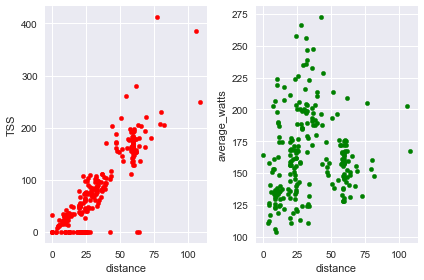

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2)

joined_df.plot(kind='scatter',x='distance',y='TSS', ax=ax1 ,color='red')
joined_df.plot(kind='scatter',x='distance',y='average_watts', ax=ax2 ,color='green')
fig.tight_layout()

* There is almost a linear relation between Distance and TSS. As the distance increases the TSS also increases. Whereas when we look at distance and average_watts there appears to be a linear relationship between those two factors but not quite clear.

Text(0.5, 0, 'time in secs')

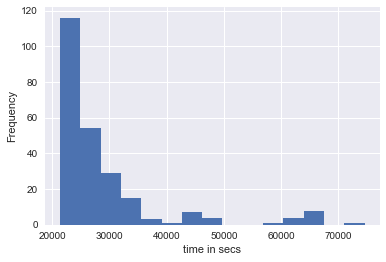

In [14]:
pd.to_timedelta(joined_df['time']).dt.total_seconds().plot.hist(bins=15)
plt.xlabel('time in secs')

* When time is looked at in seconds it seems that the graph is right skewed

In [15]:
import seaborn as sns
from pandas import DataFrame

In [16]:
indexes = joined_df[['distance','moving_time','Average Speed', 'Average Heart Rate','Average Power','NP', 'elevation_gain', 'TSS']]

In [17]:
indexes.skew(axis=0, skipna=True)

distance              0.616377
moving_time           0.612342
Average Speed        -0.987502
Average Heart Rate   -1.965619
Average Power        -1.063853
NP                   -1.486573
TSS                   1.016523
dtype: float64

Observations: From the skew() in-built function we get the skewness of the data over a requested axis wherein a value closer to 0 represents a normal distribution. Here axis=0 uses index for calculating the skewness.

### Task 3. Explore the relationships between the following variables. Are any of them corrolated with each other (do they vary together in a predictable way)? Can you explain any relationships you observe?

In [18]:
corr =indexes.corr()
corr

,distance,moving_time,Average Speed,Average Heart Rate,Average Power,NP,TSS
distance,1.000000,0.919235,0.354813,0.184272,0.283746,0.347391,0.880188
moving_time,0.919235,1.000000,0.024566,0.057413,0.011593,0.093727,0.781805
Average Speed,0.354813,0.024566,1.000000,0.316336,0.775712,0.707347,0.340263
Average Heart Rate,0.184272,0.057413,0.316336,1.000000,0.335747,0.264890,0.209751
Average Power,0.283746,0.011593,0.775712,0.335747,1.000000,0.955567,0.500283
NP,0.347391,0.093727,0.707347,0.264890,0.955567,1.000000,0.591343
TSS,0.880188,0.781805,0.340263,0.209751,0.500283,0.591343,1.000000


[Text(0.5, 0, 'distance'),
 Text(1.5, 0, 'moving_time'),
 Text(2.5, 0, 'Average Speed'),
 Text(3.5, 0, 'Average Heart Rate'),
 Text(4.5, 0, 'Average Power'),
 Text(5.5, 0, 'NP'),
 Text(6.5, 0, 'TSS')]

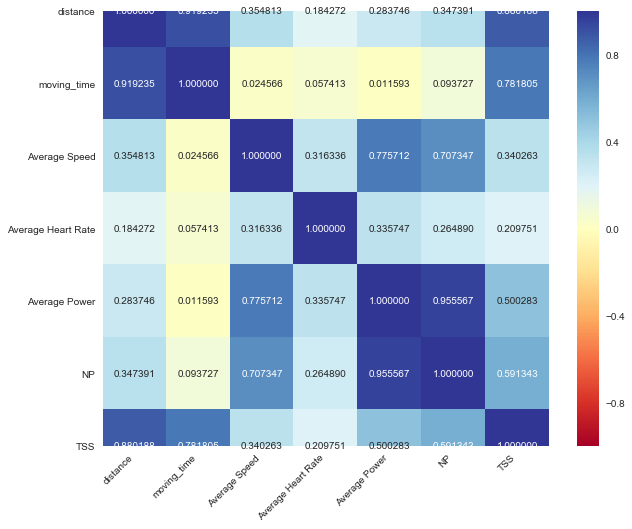

In [19]:
fig, ax = plt.subplots(figsize=(10,8))

ax = sns.heatmap(corr, vmin = -1,vmax=1, cmap='RdYlBu', annot=True, fmt="f")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')

###### Heatmap : A rectangular color encoded matrix which shows the correlation between variables on a scale of 1 to -1. Wherein 1 represents high correlation and -1 the least. Dark blue colors here represent higher correlation. Here we use the dataframe.corr() function to first get the correlation between the variables and then plot it into a heatmap.

Observations:
1. Distance is highly related to TSS and moving_time which is represented by darked shades of blue i.e. 0.880188 and 0.919325 . It is obvious that as the distance increases the moving_time increases and it has an impact on Training Stress Score. Higher the TSS value indicates a higher difficulty level of the workout_type.  
2. Average Speed has a high relation to Average Power(0.775712) which is then followed by NP (0.707347). While with the distance has almost a value of 0.35. 
3. The least correlation is seen between Average Power,Average Speed and moving_time (0.011593/0.024566). This reflects that moving_time of a ride doesn't have a much impact on the average speed or power of the ride.
4. One more highly evident relation is between Average Power and NP.

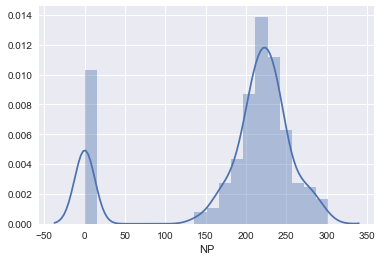

In [20]:
p = sns.distplot(joined_df.NP)
plt.show()

### Task 4. Some of the rides are designated as "Race" in the workout_type field, these are where I am racing and you might expect that these would be the most challenging rides. Normalised Power (NP) is a good measure of how hard a ride is. Explore the values of NP for races vs the overall set of rides to see if this hypothesis is supported (use graphs and summary statistics). Are races more challenging than rides in general?

In [21]:
joined_df['workout_type'].unique()

array(['Ride', 'Race', 'Workout'], dtype=object)

In [22]:
joined_df.groupby('workout_type').median()

,average_heartrate,average_temp,average_watts,distance,elapsed_time,kudos,moving_time,axPower,aPower Relative Intensity,aBikeScore,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
workout_type,,,,,,,,,,,,,,,,,,,,,
Race,145.10,14.0,215.50,32.10,54.0,16.0,54.0,234.7840,0.876062,73.69025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,257.1700,0.959591,84.62545
Ride,119.95,15.0,151.35,26.15,93.5,10.0,81.5,189.9235,0.708670,48.39475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,211.3445,0.788600,57.35585
Workout,125.10,11.0,185.70,25.50,60.0,7.0,60.0,212.9850,0.794720,67.12280,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,224.1090,0.836229,73.74900


* If the rides are grouped by the 'workout_type' field and median of those values is taken it is evident Normalized power of the workout_type Race is the highest. It can be considered as an indicator of how challenging the workout type is. 

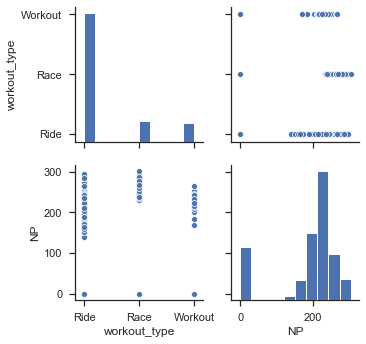

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
pp = sns.pairplot(joined_df, vars=['workout_type', 'NP'])

plt.show()

In [24]:
races_df = joined_df[joined_df['workout_type'] == 'Race']
exclude_race_df= joined_df[joined_df['workout_type'] != 'Race']

In [25]:
race_avh= races_df['average_heartrate'].mean()
exclude_race_avh= exclude_race_df['average_heartrate'].mean()

df= pd.DataFrame({'label':['Races','Excluding Races'], 'val':[race_avh,exclude_race_avh]})

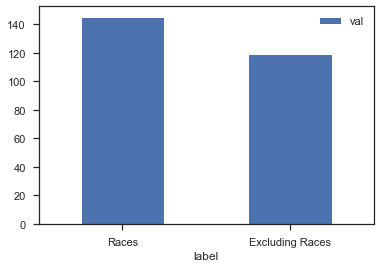

In [26]:
ax = df.plot.bar(x='label', y='val', rot=0)

In [27]:
surplus = {(race_avh-exclude_race_avh)/race_avh * 100}
print(surplus)

{17.962568342807046}


Observation : From the above bar plot it is evident that the average heart rate is higher (17.96%) when the activity type is Races and lower if not in Races.

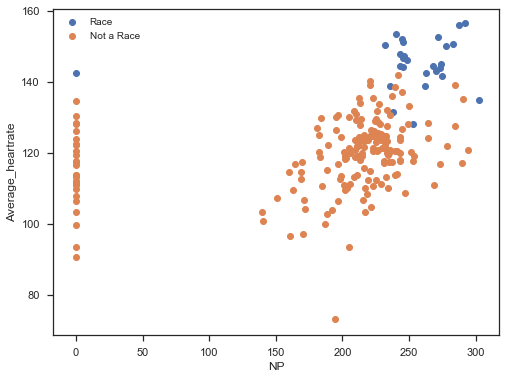

In [28]:
#joined_df.plot(kind='scatter',x='distance',y='average_watts' ,color='green')
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(races_df['NP'], races_df['average_heartrate'],  label='Race')
plt.scatter(exclude_race_df['NP'], exclude_race_df['average_heartrate'], label='Not a Race')
plt.legend(scatterpoints=1,loc='upper left', ncol=1, fontsize=10)
plt.xlabel('NP')
plt.ylabel('Average_heartrate')
plt.show()

* From the scatter plot we can observe that the average_heartrate for workout_type Race is higher as compared to other workout types. This could be seen as a indicator of Races being challenging

### Task 5. It is useful to see a summary of rides over the year. Generate a plot that summarises the number of km ridden each month over the period of the data. Overlay this with the sum of the Training Stress Score and the average of the Average Speed to generate an overall summary of activity.

In [29]:
ride_summary=joined_df.groupby(['Date', 'workout_type', 'TSS','Average Speed']).sum()

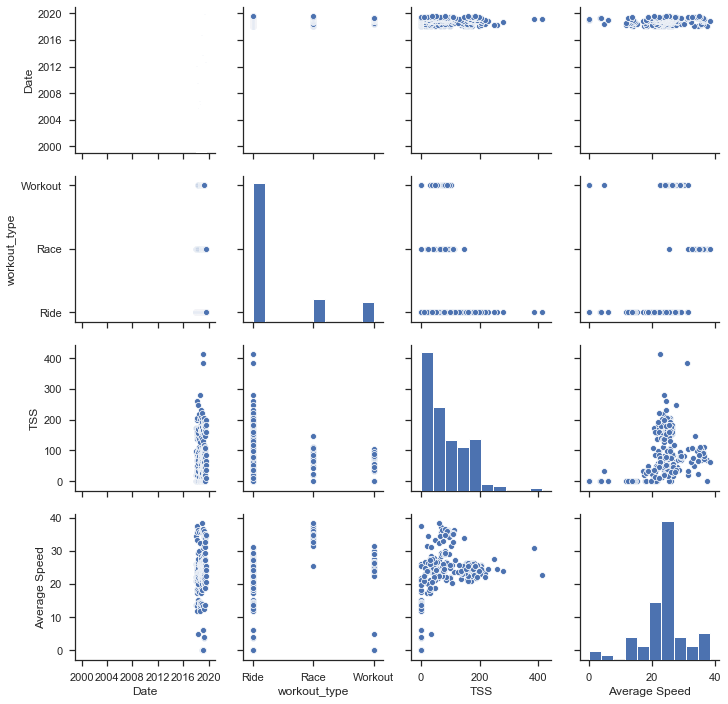

In [30]:
rs = sns.pairplot(joined_df, vars=['Date', 'workout_type', 'TSS','Average Speed'])

In [31]:
month_df=joined_df.groupby([(joined_df.index.year),(joined_df.index.month)]).sum()

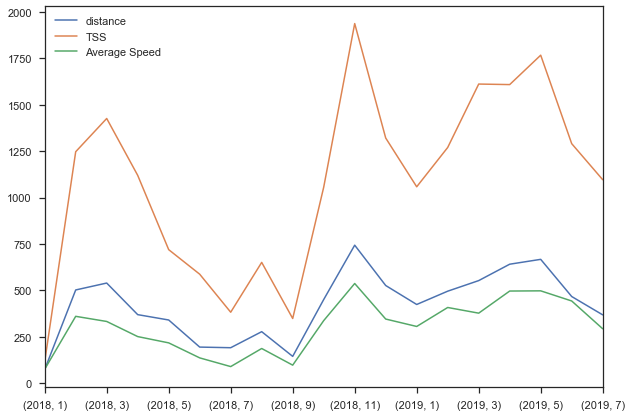

In [32]:
plt.rcParams['figure.figsize'] = (10,7)
month_df[['distance','TSS','Average Speed']].plot()

Observation: From the plot it looks like that the lowest activity was between May-2018 to September-2018. 

## Challenge

### What leads to more kudos? Is there anything to indicate which rides are more popular? Explore the relationship between the main variables and kudos. Show a plot and comment on any relationship you observe.

In [33]:
corr1 = joined_df.corr()

In [34]:
kudos_df = pd.DataFrame(index=corr1.index)

kudos_df.index = corr1.index

In [35]:
kudos_df["kudos"] = corr1["kudos"]

kudos_df = kudos_df.dropna()
kudos_df

,kudos
average_heartrate,0.372500
average_temp,-0.019307
average_watts,0.264645
distance,0.743757
elapsed_time,0.266218
...,...
W4 W'bal Work Severe Fatigue,0.304743
Below CP Work,0.592078
NP,0.241040
IF,0.241040


In [36]:
kudos_df.T[['distance','moving_time','Average Speed', 'Average Heart Rate','Average Power','NP', 'Elevation Gain', 'TSS','Aerobic TISS','Distance Swim']]

,distance,moving_time,Average Speed,Average Heart Rate,Average Power,NP,Elevation Gain,TSS,Aerobic TISS,Distance Swim
kudos,0.743757,0.646611,0.411414,0.182487,0.218981,0.24104,0.611697,0.626638,0.682368,0.743859


Few of the above variables are highly correlated with Kudos. This means the higher values of 'Distance', 'Aerobic TISS' and 'Distance Swim' would attract more Kudos.

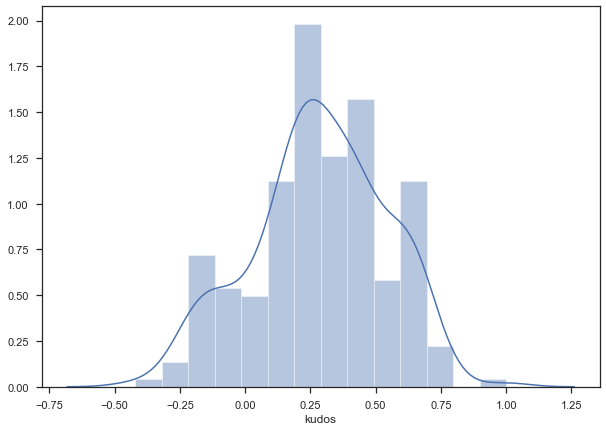

In [37]:
sns.distplot(kudos_df["kudos"])

### Generate another summary graph but one that shows the activity over a given month, with the sum of the values for each day of the month shown. So, if there are two rides on a given day, the graph should show the sum of the distances etc for these rides.

In [38]:
#Has the figures on a month level
month_df

average_heartrate  average_temp  average_watts  distance  \
2018 1               377.3          62.0          484.1      72.5   
     2              1599.1         290.0         2330.3     501.5   
     3              1435.3         256.0         2223.0     538.8   
     4              1022.2         199.0         1812.9     368.4   
     5               845.7          98.0         1612.1     339.5   
     6               630.0          41.0          854.6     193.4   
     7               375.9          23.0          534.4     190.0   
     8               976.0         103.0         1552.1     276.5   
     9               511.2          43.0          686.5     143.3   
     10             1657.4          88.0         2245.7     449.9   
     11             2414.4         243.0         3332.8     743.0   
     12             1627.4         186.0         2221.9     525.5   
2019 1              2152.5         254.0         1953.4     423.2   
     2              2123.2         158.0         2677.8     494.9   
     3              1745.9         138.0         2400.5     552.0   
     4              2008.0         209.0         3208.6     640.4   
     5              1952.7         114.0         3292.6     666.6   
     6              1803.2         124.0         2968.8     466.1   
     7               982.9          63.0         1959.8     367.2   

         elapsed_time  kudos  moving_time   axPower  \
2018 1            733     29          197   428.250   
     2           1990    168         1271  2400.375   
     3           2272    178         1375  2447.506   
     4           1053    134          897  2311.042   
     5           2751    104          939  1385.648   
     6            536     64          427  1081.564   
     7            646     65          488   505.540   
     8           1564    115          821   876.952   
     9            995     59          366   628.278   
     10          1859    144         1111  2470.208   
     11          2167    233         1790  3972.149   
     12          1425    151         1229  2539.665   
2019 1           1967    179         1324  2192.911   
     2           1345    181         1179  3070.782   
     3           1367    179         1221  2804.868   
     4           2243    244         1794  3735.850   
     5           1838    219         1547  3579.842   
     6           1218    157         1035  3383.768   
     7           1045    124          840  2318.307   

         aPower Relative Intensity  aBikeScore  ...  Rest AVNN  Rest SDNN  \
2018 1                    1.597950    96.91890  ...          0          0   
     2                    8.956620  1105.37250  ...          0          0   
     3                    9.132500  1227.32340  ...          0          0   
     4                    8.623300  1018.52240  ...          0          0   
     5                    5.170320   617.92760  ...          0          0   
     6                    4.035690   528.02050  ...          0          0   
     7                    1.886340   321.60710  ...          0          0   
     8                    3.272210   584.44830  ...          0          0   
     9                    2.344320   302.32940  ...          0          0   
     10                   9.217180   947.51500  ...          0          0   
     11                  14.821440  1683.34500  ...          0          0   
     12                   9.476360  1140.43270  ...          0          0   
2019 1                    8.182480   915.87900  ...          0          0   
     2                   11.458120  1088.31800  ...          0          0   
     3                   10.465927  1464.61181  ...          0          0   
     4                   13.939740  1422.02978  ...          0          0   
     5                   13.357618  1575.11490  ...          0          0   
     6                   12.625999  1130.84450  ...          0          0   
     7                    8.650400   940.07280  ...          0  

In [39]:
march = month_df.iloc[14][0:366]
#Selecting Variables
new_df = march[['distance','moving_time','Average Speed', 'Average Heart Rate','Average Power','NP', 'Elevation Gain', 'TSS','Aerobic TISS']]
new_df

distance               552.00000
moving_time           1221.00000
Average Speed          376.37910
Average Heart Rate    1742.65270
Average Power         2226.45400
NP                    3017.65800
Elevation Gain        4736.26700
TSS                   1611.97480
Aerobic TISS          1646.90109
Name: (2019, 3), dtype: float64

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 9 Text xticklabel objects>)

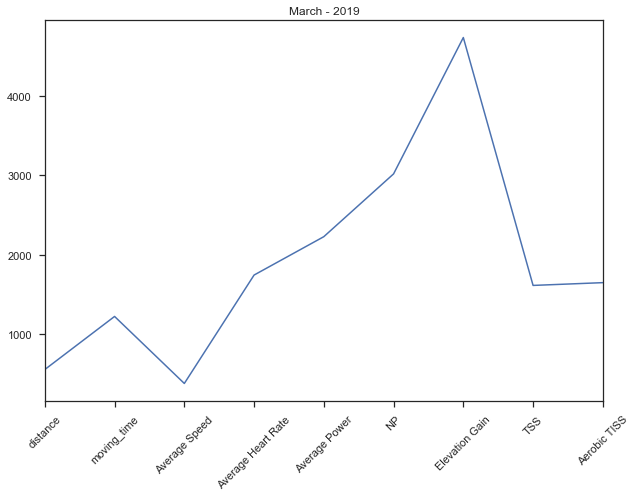

In [40]:
new_df.plot()
plt.title('March - 2019')
plt.xticks(rotation=45)